**Model_Evaluation**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data=pd.read_excel("/content/Crude Oil Prices Daily.xlsx")

In [13]:
data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [14]:
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [17]:
data.dropna(axis=0,inplace=True)

In [18]:
data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [16]:
data_oil=data.reset_index()['Closing Value']
data_oil


0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8218    74.19
8219      NaN
8220    73.05
8221    73.78
8222    73.93
Name: Closing Value, Length: 8223, dtype: float64

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_oil=scaler.fit_transform(np.array(data_oil).reshape(-1,1))

In [20]:
data_oil

array([[0.11335703],
       [0.11661484],
       [0.12053902],
       ...,
       [0.46497853],
       [0.47038353],
       [0.47149415]])

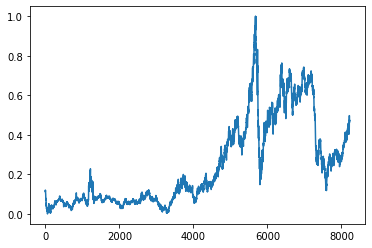

In [26]:
plt.plot(data_oil)

In [27]:
training_size=int(len(data_oil)*0.65)
test_size=len(data_oil)-training_size
train_data,test_data=data_oil[0:training_size,:],data_oil[training_size:len(data_oil),:1]

In [28]:
training_size,test_size

(5344, 2879)

In [29]:
train_data.shape

(5344, 1)

In [36]:
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [37]:
time_step=10
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [38]:
print(x_train.shape),print(y_train.shape)

(5333, 10)
(5333,)


(None, None)

In [39]:
print(x_test.shape),print(y_test.shape)

(2868, 10)
(2868,)


(None, None)

In [40]:
x_train


array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.35295424, 0.36376425, 0.35591589, ..., 0.37916482, 0.38153413,
        0.38294092],
       [0.36376425, 0.35591589, 0.36391234, ..., 0.38153413, 0.38294092,
        0.38005331],
       [0.35591589, 0.36391234, 0.37042796, ..., 0.38294092, 0.38005331,
        0.36872501]])

In [41]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [43]:
model=Sequential()

In [44]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))

In [45]:
model.add(Dense(1))

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [49]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=64,verbose=1)

Epoch 1/5
84/84 [==============================] - 3s 36ms/step - loss: 1.2105e-04 - val_loss: nan
Epoch 2/5
84/84 [==============================] - 3s 31ms/step - loss: 1.2767e-04 - val_loss: nan
Epoch 3/5
84/84 [==============================] - 2s 19ms/step - loss: 1.1877e-04 - val_loss: nan
Epoch 4/5
84/84 [==============================] - 1s 17ms/step - loss: 1.3267e-04 - val_loss: nan
Epoch 5/5
84/84 [==============================] - 1s 17ms/step - loss: 1.1510e-04 - val_loss: nan


In [50]:
train_predict=scaler.inverse_transform(train_data) 
test_predict=scaler.inverse_transform(test_data)
### Calculate RMSE performance metrics
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_data,train_predict))

29.383753633005615